#### 5.0 Model selection 

In [ ]:
import pandas as pd

# Load the data
data_df = pd.read_pickle('../data/parsed_data_all_positions.pkl')

In [ ]:
# Check the data types of all columns
print(data_df.dtypes)

# Check for any non-numeric data in the columns
non_numeric_columns = data_df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Optionally, check if any of the non-numeric columns contain strings or other unexpected data
for col in non_numeric_columns:
    print(f"Unique values in {col}:")
    print(data_df[col].unique())

Rank               object
Name               object
Age                object
Exp                object
G                  object
Cmp                object
Att                object
Cm%                object
PYd                object
Y/Att              object
PTD                object
Int                object
Rsh                object
RshYd              object
RshTD              object
FP/G               object
FantPt             object
Position            int64
Year               object
Week                int64
Scoring profile    object
Y/Rsh              object
Rec                object
RecYd              object
RecTD              object
Y/Rec              object
dtype: object
Non-numeric columns: Index(['Rank', 'Name', 'Age', 'Exp', 'G', 'Cmp', 'Att', 'Cm%', 'PYd', 'Y/Att',
       'PTD', 'Int', 'Rsh', 'RshYd', 'RshTD', 'FP/G', 'FantPt', 'Year',
       'Scoring profile', 'Y/Rsh', 'Rec', 'RecYd', 'RecTD', 'Y/Rec'],
      dtype='object')
Unique values in Rank:
['1' '2' '3' '4' '5' '6

In [10]:
import pandas as pd
import numpy as np

# Example of your data loading
data_df = pd.read_pickle('/workspaces/maria272727fantasy_sports_assistant/data/parsed_data_all_positions.pkl')

# Step 1: Convert the columns to numeric, coercing any errors to NaN
# Attempt conversion of all columns to numeric
for col in data_df.columns:
    # Skip non-numeric columns like 'Name', 'Rank', 'Position', etc.
    if data_df[col].dtype == 'object':  # Only process columns that are objects
        data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

# Now let's check the data types after conversion
print(data_df.dtypes)

# Step 2: Handle any NaN values after the conversion
# Fill NaN values with the mean of each column (or other strategies like median)
data_df.fillna(data_df.mean(), inplace=True)

# Step 3: Verify that all columns are numeric now
print(data_df.dtypes)

Rank                 int64
Name               float64
Age                float64
Exp                float64
G                    int64
Cmp                float64
Att                float64
Cm%                float64
PYd                float64
Y/Att              float64
PTD                float64
Int                float64
Rsh                float64
RshYd              float64
RshTD              float64
FP/G               float64
FantPt             float64
Position             int64
Year               float64
Week                 int64
Scoring profile    float64
Y/Rsh              float64
Rec                float64
RecYd              float64
RecTD              float64
Y/Rec              float64
dtype: object
Rank                 int64
Name               float64
Age                float64
Exp                float64
G                    int64
Cmp                float64
Att                float64
Cm%                float64
PYd                float64
Y/Att              float64
PTD           

In [11]:
# Check data types again after the cleaning process
print(data_df.dtypes)

# Check if there are any remaining missing values
print("Missing values after cleaning:")
print(data_df.isnull().sum())

Rank                 int64
Name               float64
Age                float64
Exp                float64
G                    int64
Cmp                float64
Att                float64
Cm%                float64
PYd                float64
Y/Att              float64
PTD                float64
Int                float64
Rsh                float64
RshYd              float64
RshTD              float64
FP/G               float64
FantPt             float64
Position             int64
Year               float64
Week                 int64
Scoring profile    float64
Y/Rsh              float64
Rec                float64
RecYd              float64
RecTD              float64
Y/Rec              float64
dtype: object
Missing values after cleaning:
Rank                   0
Name               26324
Age                    0
Exp                    0
G                      0
Cmp                    0
Att                    0
Cm%                    0
PYd                    0
Y/Att                  0
PTD

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your data
data_df = pd.read_pickle('/workspaces/maria272727fantasy_sports_assistant/data/parsed_data_all_positions.pkl')

# Step 1: Convert columns to numeric, coercing errors to NaN
for col in data_df.columns:
    if data_df[col].dtype == 'object':  # Only process object columns
        data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

# Step 2: Handle missing values
data_df.fillna(data_df.mean(), inplace=True)

# Step 3: Select numeric columns for model training
numeric_columns = [
    'Age', 'Exp', 'G', 'Cmp', 'Att', 'Cm%', 'PYd', 'Y/Att', 'PTD', 'Int', 
    'Rsh', 'RshYd', 'RshTD', 'FP/G', 'FantPt', 'Y/Rsh', 'Rec', 'RecYd', 
    'RecTD', 'Y/Rec', 'Year', 'Week'
]
df_model_clean = data_df[numeric_columns]

# Step 4: Separate features (X) and target (y)
X = df_model_clean.drop(columns=['FantPt'])  # Features (everything except 'FantPt')
y = df_model_clean['FantPt']  # Target variable

# Step 5: Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R²): 1.00


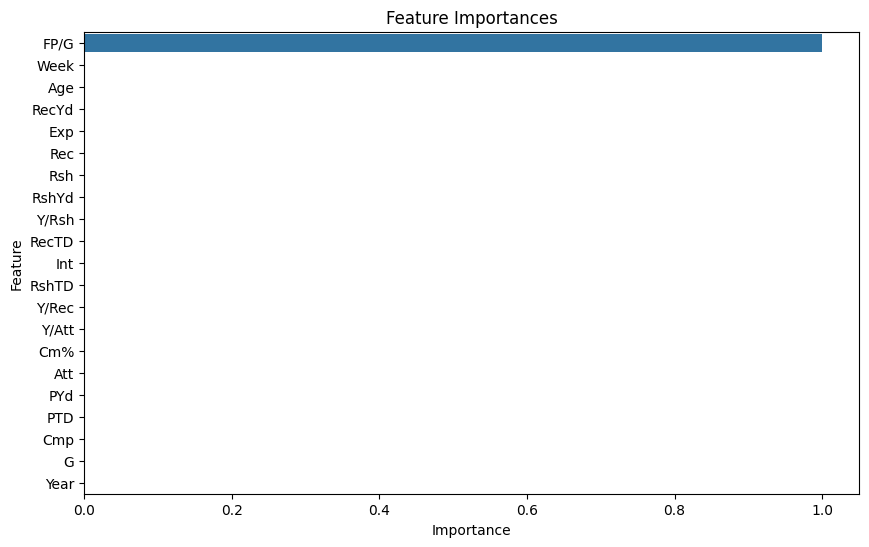

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')  # MAE as the scoring metric

print(f'Cross-validated MAE: {-cv_scores.mean():.2f}')

Cross-validated MAE: 0.00


#### 5.1 Train-test-split

In [20]:
# Assuming you have X (features) and y (target) ready after preprocessing
X = data_df[numeric_columns]  # Select numeric columns or your chosen feature columns
y = data_df['FantPt']  # Assuming you are predicting 'FantPt' (Fantasy Points)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - MAE: {rf_mae:.2f}, R²: {rf_r2:.2f}")

Random Forest - MAE: 0.00, R²: 1.00


In [25]:
import xgboost as xgb
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"XGBoost - MAE: {xgb_mae:.2f}, R²: {xgb_r2:.2f}")

XGBoost - MAE: 0.04, R²: 1.00


#### 5.2 Random forest model with grid search 

In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the model (XGBoost Regressor)
xg_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model
xg_model.fit(X_train, y_train)

# Make predictions
y_pred_xg = xg_model.predict(X_test)

# Evaluate performance
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"XGBoost - Mean Squared Error: {mse_xg}")
print(f"XGBoost - R-squared: {r2_xg}")

XGBoost - Mean Squared Error: 0.02837657378257849
XGBoost - R-squared: 0.9995340856746301


In [30]:
# Print the evaluation results for comparison
print(f"Random Forest - MAE: {rf_mae:.2f}, R²: {rf_r2:.2f}")
print(f"XGBoost - MAE: {xgb_mae:.2f}, R²: {xgb_r2:.2f}")

Random Forest - MAE: 0.00, R²: 1.00
XGBoost - MAE: 0.04, R²: 1.00


##### 5.3 Hyperparameter tunning 

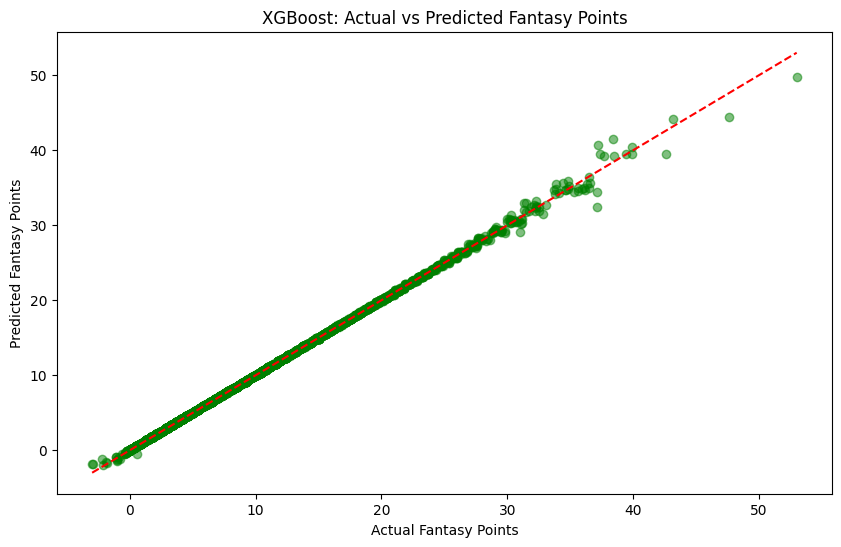

In [31]:
# Make predictions using the XGBoost model
y_pred_xg = xg_model.predict(X_test)

# Plotting Actual vs Predicted Fantasy Points for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xg, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Fantasy Points')
plt.ylabel('Predicted Fantasy Points')
plt.title('XGBoost: Actual vs Predicted Fantasy Points')
plt.show()

In [32]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model to a .pkl file
joblib.dump(rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [33]:
import joblib

# Load the trained model
rf_model = joblib.load('best_rf_model.pkl')

In [35]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('best_rf_model.pkl')

# Streamlit user interface
st.title('Fantasy Points Prediction')

# User inputs
player_stats = st.text_input("Enter player stats: ")

# Make prediction when button is clicked
if st.button('Predict Fantasy Points'):
    input_data = [float(x) for x in player_stats.split(',')]
    prediction = model.predict([input_data])
    st.write(f"Predicted Fantasy Points: {prediction[0]}")

2025-01-23 02:42:19.265 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 02:42:19.444 
  command:

    streamlit run /usr/local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-01-23 02:42:19.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 02:42:19.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 02:42:19.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 02:42:19.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 02:42:19.449 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 02:42:19.449 Session state does not fun